In [1]:
import sys 
import pandas as pd
#from train_models import train_pgbm_dengue, apply_dengue_pgbm_on_chik, train_pgbm_chik
from train_models import train_dl_model, train_transf_chik
from train_models import LOOK_BACK, PREDICT_N
from train_models import train_pgbm_model, apply_dengue_pgbm_on_chik
sys.path.append('../')
from lstm import apply_model
from pgbm_model import pgbm_pred

In [2]:
df = pd.read_csv('selected_cities.csv', index_col = 'Unnamed: 0')
df.head()

,geocode,state,sum_cases,POP22,inc,n_last_ep,year_first_ep,year_last_ep_before_2023,region,region_codes,start_train_chik,end_train_chik
0,2211001,PI,2325,868523,267.695847,4,2015,2022,ne,1,2014-10-01,2022-11-01
1,2913606,BA,1858,197163,942.367483,2,2015,2016,ne,1,2014-10-01,2016-11-01
2,2914802,BA,1846,185500,995.148248,2,2016,2022,ne,1,2015-10-01,2022-11-01
3,2111300,MA,1788,1061374,168.460882,2,2016,2022,ne,1,2015-10-01,2022-11-01
4,2925303,BA,1687,158736,1062.770890,2,2016,2017,ne,1,2015-10-01,2017-11-01


In [3]:

city = 2802106
df = df.loc[df.geocode == city]
state = df.state
INI_DATE = df.start_train_chik.values[0]
END_DATE_TRAIN = df.end_train_chik.values[0]
END_DATE = '2023-11-01'

In [4]:
print('INI_DATE:', INI_DATE)
print('END_DATE_TRAIN:', END_DATE_TRAIN)

INI_DATE: 2014-10-01
END_DATE_TRAIN: 2021-11-01


### Train the dengue DL model:

Compilation Time :  0.003022909164428711
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52, 138)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 52, 64)           103936    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                    

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

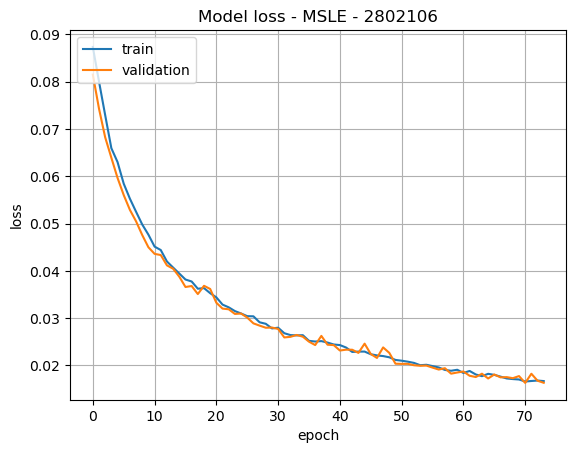

CPU times: user 14min 57s, sys: 48.5 s, total: 15min 45s
Wall time: 15min 36s


In [5]:
%%time 
train_dl_model(city,   doenca = 'dengue', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    

### Function to apply dengue model on dengue data: 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

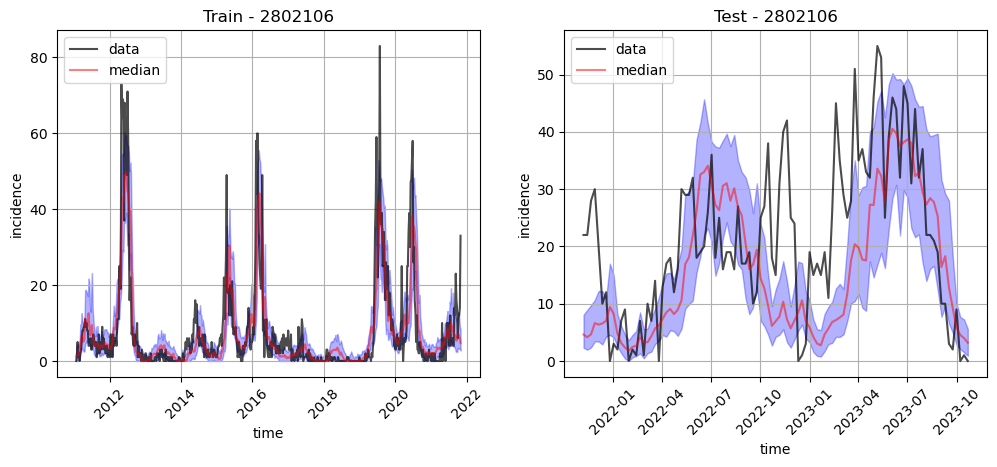

CPU times: user 16min, sys: 41.2 s, total: 16min 41s
Wall time: 16min 24s


In [6]:
%%time 
# apply NN model 
metrics = apply_model(city, ini_date = None, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/dengue_{city}_cluster.csv')
    

### Apply this dengue DL model on chik data: 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

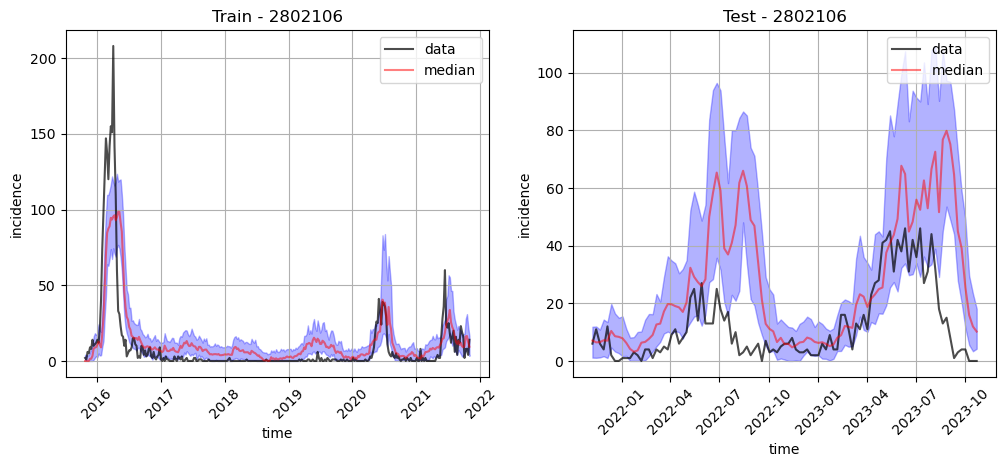

CPU times: user 9min 38s, sys: 13.6 s, total: 9min 52s
Wall time: 9min 37s


In [7]:
%%time 

# apply NN model 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

## Apply the transfer: 

Compilation Time :  0.0017910003662109375
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 52, 138)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 52, 64)           103936    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

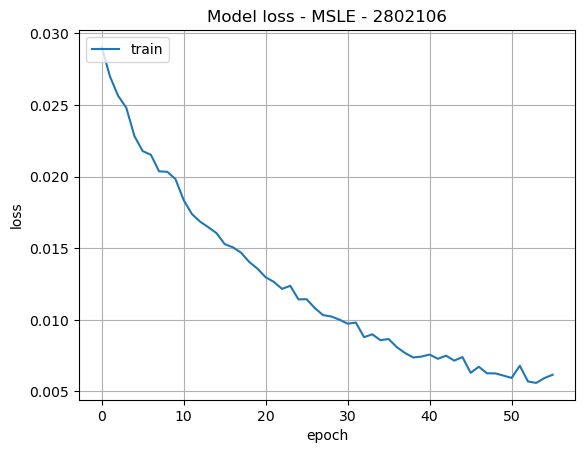

CPU times: user 21min 38s, sys: 1min 1s, total: 22min 39s
Wall time: 22min 18s


In [8]:
%%time 

train_transf_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

Apply the transfer model:

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

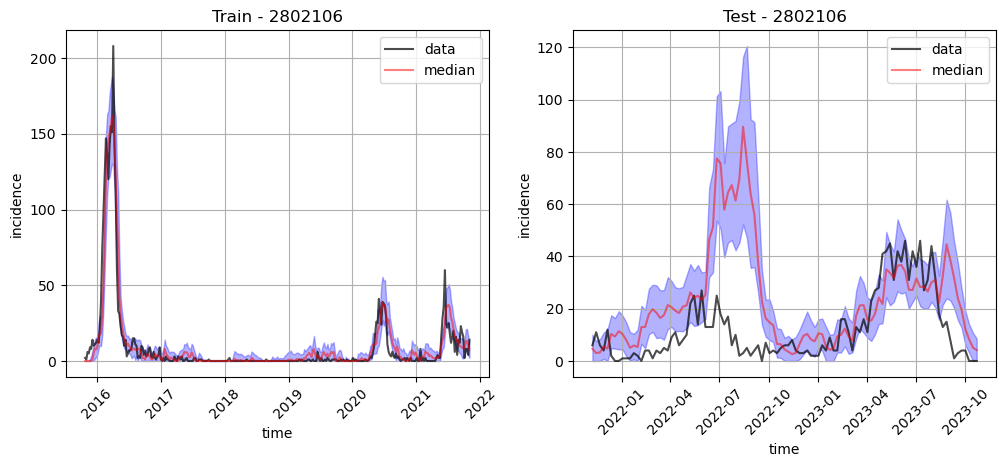

In [9]:
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_transf_pred',
                    model_name = f'trained_{city}_chik_transf_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

### Train the chik DL model:

Compilation Time :  0.01261591911315918
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 52, 138)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 52, 64)           103936    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                   

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

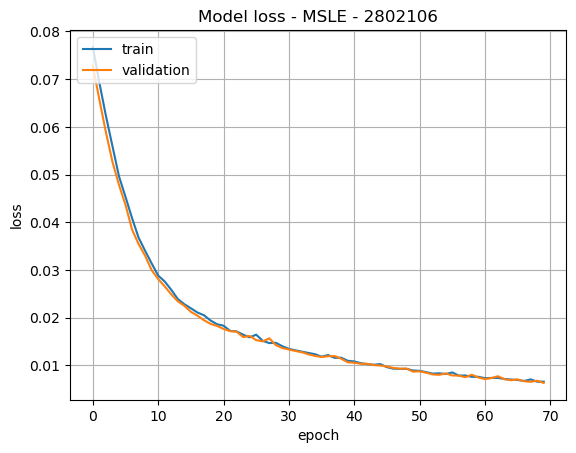

CPU times: user 16min 15s, sys: 47.7 s, total: 17min 3s
Wall time: 17min 14s


In [19]:
%%time 

train_dl_model(city,   doenca = 'chik', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    
    

### Apply the DL chik model on chik data

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

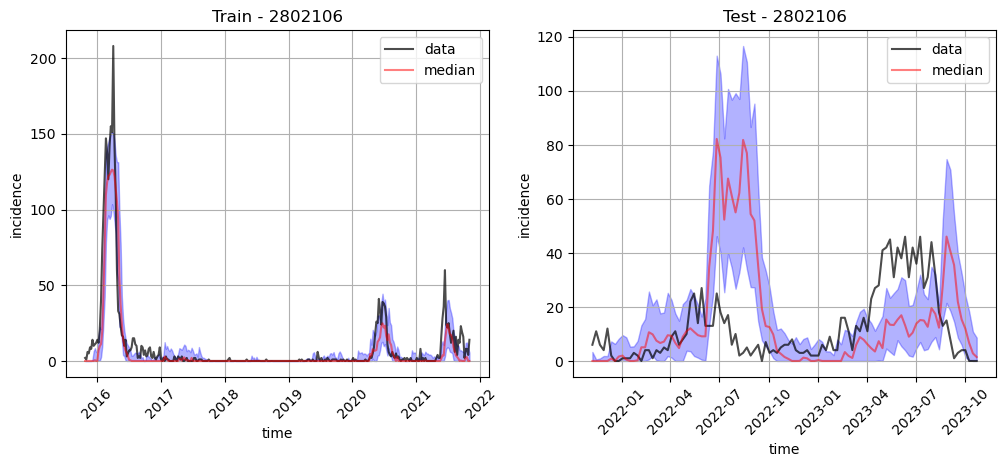

CPU times: user 10min 54s, sys: 16 s, total: 11min 10s
Wall time: 11min 8s


In [20]:
%%time 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_pred',
                    model_name = f'trained_{city}_chik_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

### Train the dengue pgbm model 

In [5]:
%%time
train_pgbm_model(city, 'dengue', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



CPU times: user 5min 32s, sys: 2min 25s, total: 7min 57s
Wall time: 1min 21s


### Apply the dengue pgbm on dengue data

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


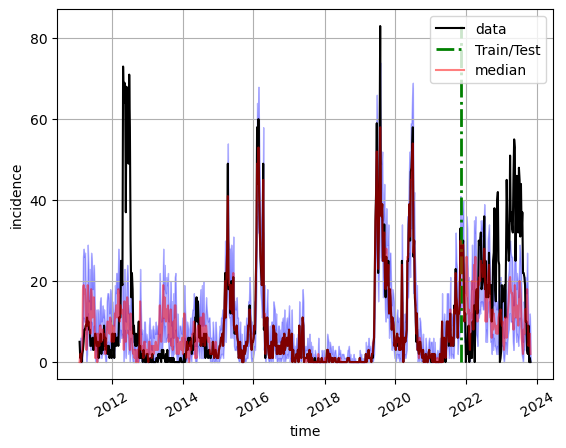

CPU times: user 9.34 s, sys: 1.46 s, total: 10.8 s
Wall time: 3.63 s


HistGradientBoostingRegressor(distribution='negativebinomial',
                              l2_regularization=0.1, random_state=0)

In [6]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'dengue', ratio = 0.75, ini_date = None, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/dengue_{city}_cluster.csv', plot = True)

### Apply the dengue pgbm model on chik:

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


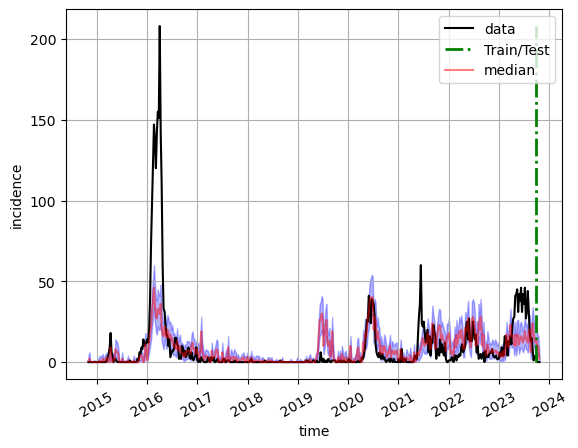

In [5]:
apply_dengue_pgbm_on_chik(city, ini_date= INI_DATE, end_date = END_DATE)

### Train the chik PGBM model:

In [8]:
%%time
train_pgbm_model(city, 'chik', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



CPU times: user 5min 48s, sys: 2min 34s, total: 8min 22s
Wall time: 1min 22s


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


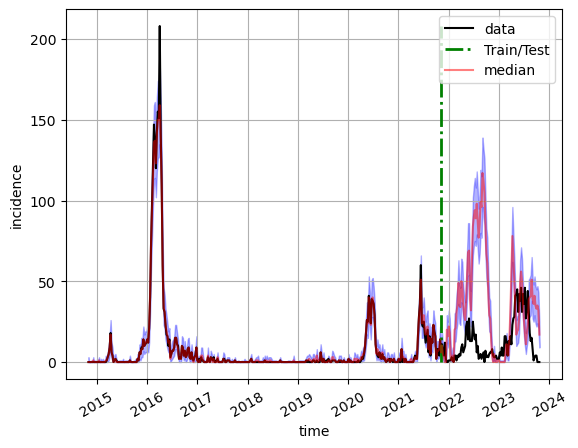

CPU times: user 7.16 s, sys: 1.49 s, total: 8.64 s
Wall time: 2.71 s


HistGradientBoostingRegressor(distribution='negativebinomial',
                              l2_regularization=0.1, random_state=0)

In [9]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'chik', ratio = 0.75, ini_date = INI_DATE, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/chik_{city}_cluster.csv')